In [1]:
# наивная байесовская классификация - набо моделей, 
# которые предлагают быстрые и простые алгоритмы классификации

In [3]:
# гауссовский наивный байесовский классификатор - данные всех категорий взяты из нормального распределения

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

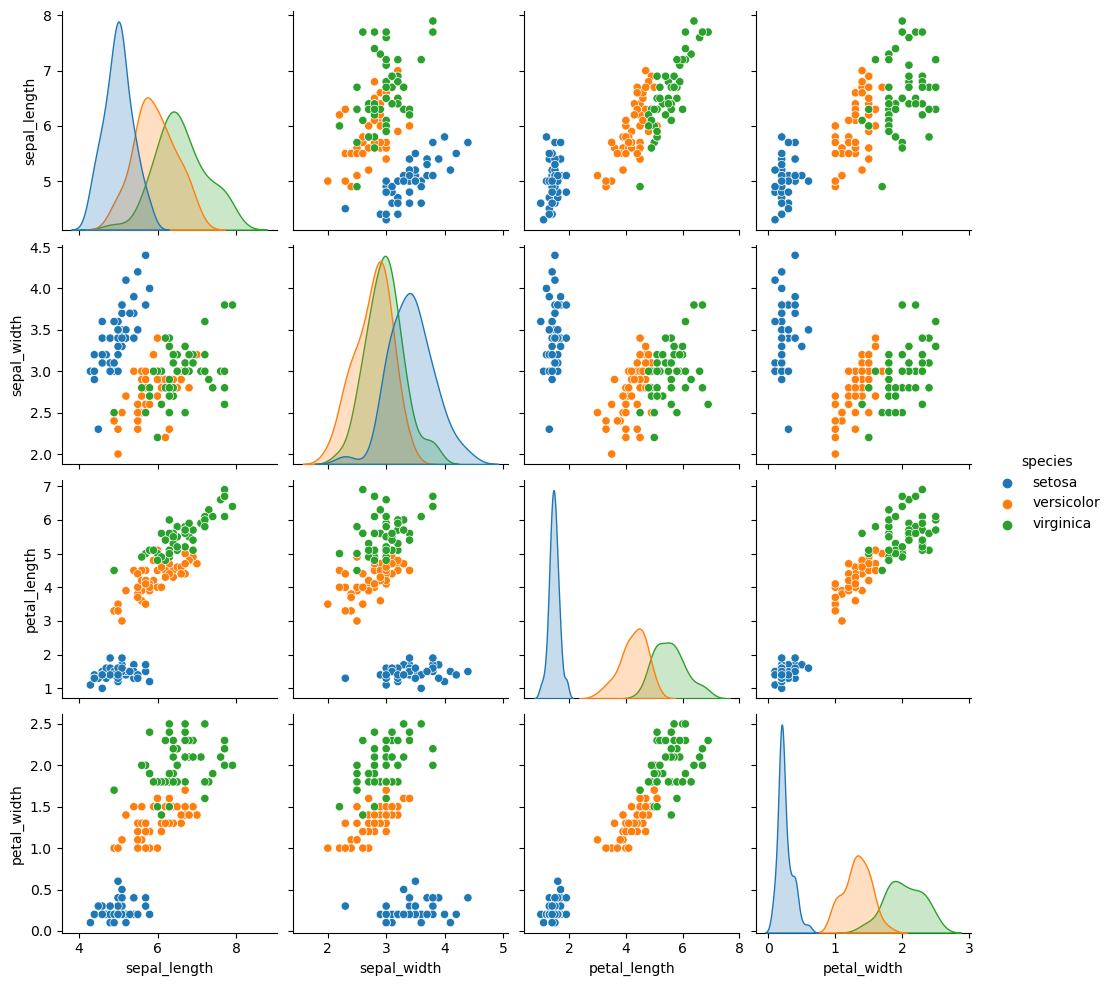

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

iris = sns.load_dataset("iris")
print(iris.head())
sns.pairplot(iris, hue='species')
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


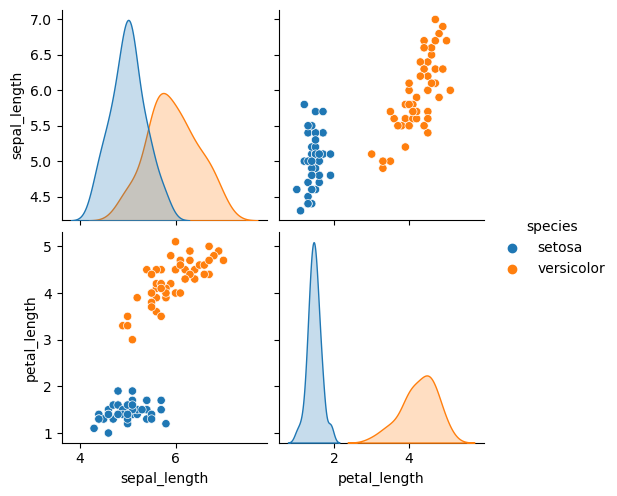

In [11]:
data = iris[["sepal_length", "petal_length", "species"]]
# setosa versicolor
data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]
sns.pairplot(data_df, hue='species')
plt.show()

In [19]:
from sklearn.naive_bayes import GaussianNB

X = data_df[["sepal_length", "petal_length"]]
y = data_df["species"]
model = GaussianNB()
model.fit(X, y)

GaussianNB()

[5.006 1.462]
[0.121764 0.029556]
[5.936 4.26 ]
[0.261104 0.2164  ]


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


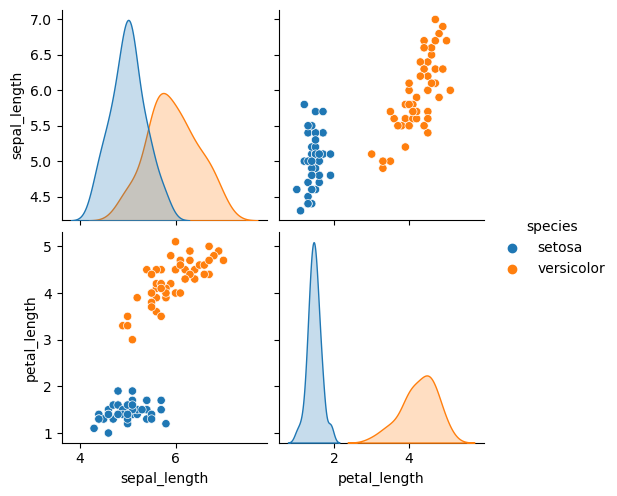

In [21]:
print(model.theta_[0])
print(model.var_[0])
print(model.theta_[1])
print(model.var_[1])

sns.pairplot(data_df, hue="species")

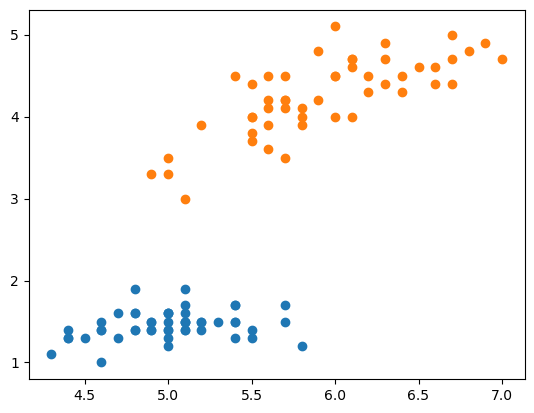

In [23]:
data_df_seposa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

plt.scatter(data_df_seposa["sepal_length"], data_df_seposa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

   sepal_length  petal_length species
0      4.300000           1.0  setosa
1      4.355102           1.0  setosa
2      4.410204           1.0  setosa
3      4.465306           1.0  setosa
4      4.520408           1.0  setosa


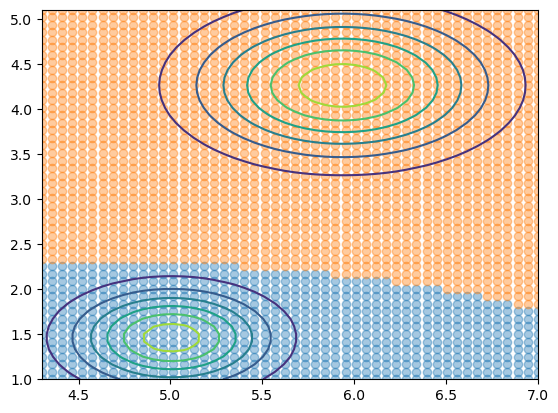

In [47]:
x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]))
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]))
X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"])
y_p = model.predict(X_p)

X_p["species"] = y_p
X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]
print(X_p.head())

plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.4)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.4)

theta0 = model.theta_[0]
var0 = model.var_[0]
theta1 = model.theta_[1]
var1 = model.var_[1]

z1 = (
    1
    / (1 * np.pi * (var0[0] * var0[1]) ** 0.5)
    * np.exp(-0.5 * ( (X1_p - theta0[0]) ** 2 / (var0[0]) + (X2_p - theta0[1]) ** 2 / (var0[0]))))

z2 = (
    1
    / (1 * np.pi * (var1[0] * var1[1]) ** 0.5)
    * np.exp(-0.5 * ( (X1_p - theta1[0]) ** 2 / (var1[0]) + (X2_p - theta1[1]) ** 2 / (var1[0]))))
plt.contour(X1_p, X2_p, z1)
plt.contour(X1_p, X2_p, z2)

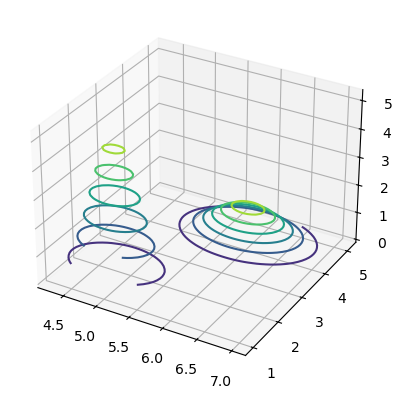

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1_p, X2_p, z1)
ax.contour3D(X1_p, X2_p, z2)